In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import matplotlib.animation as animation

In [2]:
# finds the closest node from a certain position
def closest_node(position, nodes):
    diff = np.subtract(nodes, position)
    
    errors = np.sum(np.square(diff), axis = 1)
    closest = np.argmin(errors)
    
    return nodes[closest], closest

In [3]:
def voronoi_mapping(grid_resolution, cell_count):
    
    
    nodes = []
    random.seed(1373)
    for i in range(cell_count):
        # creates a node at a random location
        curr_x = random.random()
        curr_y = random.random()
        curr_node = (curr_x, curr_y)
        nodes.append(curr_node)
        
    # iterates over a square grid whose resolution is grid_resolution.
    # At each point in the grid, determines which node is closest
    axis = np.linspace(0, 1, grid_resolution, endpoint = False)
    voronoi_map = []
    for x in axis:
        temp_map = []
        for y in axis:
            curr_position = [x, y]
            voro_node, node_index = closest_node(curr_position, nodes)
            temp_map.append(node_index)
            
        voronoi_map.append(temp_map)
        
    return voronoi_map, nodes
            

In [4]:
# creates and returns a dictionary of a cell's adjacencies

def gen_adj_dict(voronoi_map, nodes):
    grid_resolution = len(voronoi_map)
    cell_count = len(nodes)
    
    # each cell's adjacencies are stored in a set
    adj_dict = {i : set() for i in range(cell_count)}
    
    # iterates over the map in the y direction
    # detects when a change in cells occurs, and 
    # documents that as an adjacency
    prev = voronoi_map[0][0]
    for x in range(grid_resolution): # for every x value
        prev_node = voronoi_map[x][0]
        for y in range(grid_resolution): # iterates in the y direction
            curr_node = voronoi_map[x][y]
            if curr_node != prev_node: # detects changes in the closest node
                adj_dict[curr_node].add(prev_node)
                adj_dict[prev_node].add(curr_node)
            prev_node = curr_node
            
    for y in range(grid_resolution): # for every y value
        prev_node = voronoi_map[0][y]
        for x in range(grid_resolution): # iterates in the x direction
            curr_node = voronoi_map[x][y]
            if curr_node != prev_node: # detects changes in the closest node
                adj_dict[curr_node].add(prev_node)
                adj_dict[prev_node].add(curr_node)
            prev_node = curr_node
            
    return adj_dict

In [5]:
grid_resolution = 400
cell_count = 800

voronoi_map, nodes = voronoi_mapping(400, 800)
adj_dict = gen_adj_dict(voronoi_map, nodes)

0.0638275146484375
45.51284146308899


In [6]:
def update_plot(voronoi_map, node_state):
    grid_resolution = len(voronoi_map)
    plot_grid = np.zeros((grid_resolution, grid_resolution))
    
    for x in range(grid_resolution):
        for y in range(grid_resolution):
            curr_node = voronoi_map[x][y]
            if node_state[curr_node]:
                plot_grid[x][y] = ON
                
    return plot_grid

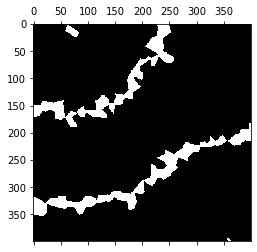

In [8]:
delay = 3
random.seed(1373)
seed_node = 0
ON = 255
OFF = 0

node_cooldown = {i : 0 for i in range(cell_count)}
node_state = {i : OFF for i in range(cell_count)}

def init():
    node_state[seed_node] = ON
    node_cooldown[seed_node] = delay
    plot_grid = update_plot(voronoi_map, node_state)

    return ax.matshow(plot_grid, cmap="Greys_r")

def transition(data):

    for node in node_cooldown:
        if node_cooldown[node] > 0:
            node_cooldown[node] -= 1
    
    node_state_copy = node_state.copy()
    for node in node_state.keys():
        if node_state_copy[node] == ON:
            node_state[node] = OFF
            for neighbor in adj_dict[node]:
                if node_cooldown[neighbor] == 0:
                    node_cooldown[neighbor] = delay
                    node_state[neighbor] = ON

    
    
    if data % 10 == 0:
        node_state[seed_node] = ON
        node_cooldown[seed_node] = delay
        
        
    plot_grid = update_plot(voronoi_map, node_state)

    
    return ax.matshow(plot_grid, cmap="Greys_r")

plot_grid = np.zeros((grid_resolution, grid_resolution))

fig, ax = plt.subplots()
mat = ax.matshow(plot_grid, cmap="Greys_r")
ani = animation.FuncAnimation(fig, transition, interval=50, save_count=50, init_func = init)

from IPython.display import HTML
HTML(ani.to_jshtml())